<a href="https://colab.research.google.com/github/Lajs5257/DevF-MachineLearning/blob/main/LINEAR_REGRESSION_AND_REGRESSION_METRICS_2209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Los modelos lineales son una clase de modelos muy usados en la practica y han sido estudiados extensivamente en las ultimas decadas, estos hacen sus predicciones usando funciones lineales sobre los features (variables) de los datasets.

## Ejemplos

### Valor de una póliza

En este ejemplo la tarea que debemos realizar es automatizar la generación del precio de la póliza de un seguro médico, cómo referencia tenemos los precios de pólizas que han sigo asignados manualmente previamente, pero con base en esos criterios queremos automatizar


Contamos con una tabla con el __HISTORICO__ de las características de varios clientes

|EDAD|SEXO|BMI|HIJOS|FUMADOR|ACCIDENTES|<font color='CD5C5C'>VALOR_DE_POLIZA_USD</font>|
|---|---|---|---|---|---|---|
|19|0|27.9|0|1|2|16884.924|
|18|1|33.77|1|0|3|1725.5523|
|28|1|33|3|0|1|4449.462|
|33|1|22.705|0|0|5|21984.47061|
|32|1|28.88|0|0|0|3866.8552|
|31|0|25.74|0|0|0|3756.6216|
|46|0|33.44|1|0|1|8240.5896|
|37|0|27.74|3|0|1|7281.5056|
|37|1|29.83|2|0|1|6406.4107|
|60|0|25.84|0|0|4|28923.13692|
|25|1|26.22|0|0|2|2721.3208|
|62|0|26.29|0|1|2|27808.7251|
|23|1|34.4|0|0|1|1826.843|
|56|0|39.82|0|0|4|11090.7178|
|27|1|42.13|0|1|0|39611.7577|

Buscamos generar un algoritmo (formula) que tenga la siguiente forma:

$\beta_0$ + (EDAD)$\beta_1$ + (SEXO)$\beta_2$ + (BMI)$\beta_3$ + (HIJOS)$\beta_4$ + (FUMADOR)$\beta_5$ + (ACCIDENTES)$\beta_6$ = <font color='CD5C5C'>VALOR_DE_POLIZA_USD</font>

Cuando tengamos casos nuevos, usaremos nuestro modelo para generar los valores de póliza correspondientes

|EDAD|SEXO|BMI|HIJOS|FUMADOR|ACCIDENTES|<font color='CD5C5C'>VALOR_DE_POLIZA_USD</font>|
|---|---|---|---|---|---|---|
|19|0|30.88|0|0|0|?|
|57|0|31.44|2|1|1|?|
|45|0|29.84|3|0|0|?|
|21|1|21.22|0|0|3|?|

### Esperanza de vida

En este ejemplo queremos generar un pronostico para saber cual es la esperanza de vida promedio de algunos paises con base en las muertes infantiles por cada mil nacimientos y los casos de VIH por cada mil habitantes.

Contamos con los datos registrados para algunos paises, pero hay paises donde esta información no esta disponible, por eso queremos entrenar un modelo que nos ayude.

|MUERTE_INFANTIL|CASOS_VIH|<font color='CD5C5C'>ESPERANZA_DE_VIDA</font>|
|---|---|---|
|40|0.7|59|
|43|5|48.1|
|1|0.4|67.4|
|2|38.8|47.8|
|7|3|64.2|
|66|1.9|52.4|
|63|6.1|48.7|
|97|2.1|45.7|
|92|2.6|47.4|
|13|0.3|67|
|25|2.2|58.5|
|46|4.7|49.6|
|48|4|51|
|51|4.9|55.6|
|54|6.3|54.8|
|59|7.5|52.1|
|60|7.8|51.6|
|15|4.5|58|
|17|13.9|45.6|

Buscamos generar un algoritmo (formula) que tenga la siguiente forma:

$\beta_0$ + (MUERTE_INFANTIL)$\beta_1$ + (CASOS_VIH)$\beta_2$ = <font color='CD5C5C'>ESPERANZA_DE_VIDA</font>

|MUERTE_INFANTIL|CASOS_VIH|<font color='CD5C5C'>ESPERANZA_DE_VIDA</font>|
|---|---|---|
|15|19|?|
|6|27.9|?|
|40|2|?|
|12|13|?|

## Modelo de regresión lineal

La forma general para un modelo de regresión lineal es la siguiente:

$$ \hat{y} = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i} $$

* $x_i$ para $i=0,...,n$  denota los features (variables) de un punto (un registro). 
* $\beta_{0}$ se le conoce como el sesgo, intercepto o bias y es un parametro que el modelo aprenderá 
* $\beta_i$ para $i=1,...,n$ son parametros que el modelo aprenderá
* $\hat{y}$ es la predicción que el modelo realiza

## Perdida y Costo

Consideremos el ejemplo de __Esperana de vida__ y propongamos algunos modelos, para esto, tomaremos una parte de los datos historicos (donde conocemos los valores reales) para ver que tan buenos o malos son estos modelos

* MODELO 01

    __50__ + (MUERTE_INFANTIL)__0.5__ + (CASOS_VIH)__1.3__ = <font color='CD5C5C'>ESPERANZA_DE_VIDA</font>

* MODELO 02

    __70__ + (MUERTE_INFANTIL)__(-0.1)__ + (CASOS_VIH)__(-2)__ = <font color='CD5C5C'>ESPERANZA_DE_VIDA</font>

* MODELO 03

    __60__ + (MUERTE_INFANTIL)__(-0.5)__ + (CASOS_VIH)__(-0.9)__ = <font color='CD5C5C'>ESPERANZA_DE_VIDA</font>

|MUERTE_INFANTIL|CASOS_VIH|<font color='CD5C5C'>ESPERANZA_DE_VIDA</font>|<font color='#D4AC0D'>MODELO_01</font>|<font color='#D4AC0D'>MODELO_02</font>|<font color='#D4AC0D'>MODELO_03</font>|
|---|---|---|---|---|---|
|1|0.4|67.4|51.02   |69.1|69.14|
|7|3|64.2|57.4      |63.3|63.8|
|63|6.1|48.7|89.43  |51.5|33.01|
|92|2.6|47.4|99.38  |55.59|21.66|
|25|2.2|58.5|65.36  |63.1|55.52|
|48|4|51|79.2       |57.2 |42.4|
|54|6.3|54.8|85.19  |51.99|37.33|
|60|7.8|51.6|90.14  |48.4 |32.98|
|17|13.9|45.6|76.57 |40.5 |48.99|

In [ ]:
#@title De manera intuitiva, prueba algunos modelos:

b = 50
b1 = .5
b2 = 1.3

print(b + 1 *b1 + 0.4 *b2)
print(b + 7 *b1 + 3   *b2)
print(b + 63*b1 + 6.1 *b2)
print(b + 92*b1 + 2.6 *b2)
print(b + 25*b1 + 2.2 *b2)
print(b + 48*b1 + 4   *b2)
print(b + 54*b1 + 6.3 *b2)
print(b + 60*b1 + 7.8 *b2)
print(b + 17*b1 + 13.9*b2)

51.02
57.4
89.43
99.38
65.36
79.2
85.19
90.14
76.57


Si tomamos los puntos de la esperanza de vida y gráficamos las lineas generadas por cada modelo tendríamos lo siguiente:

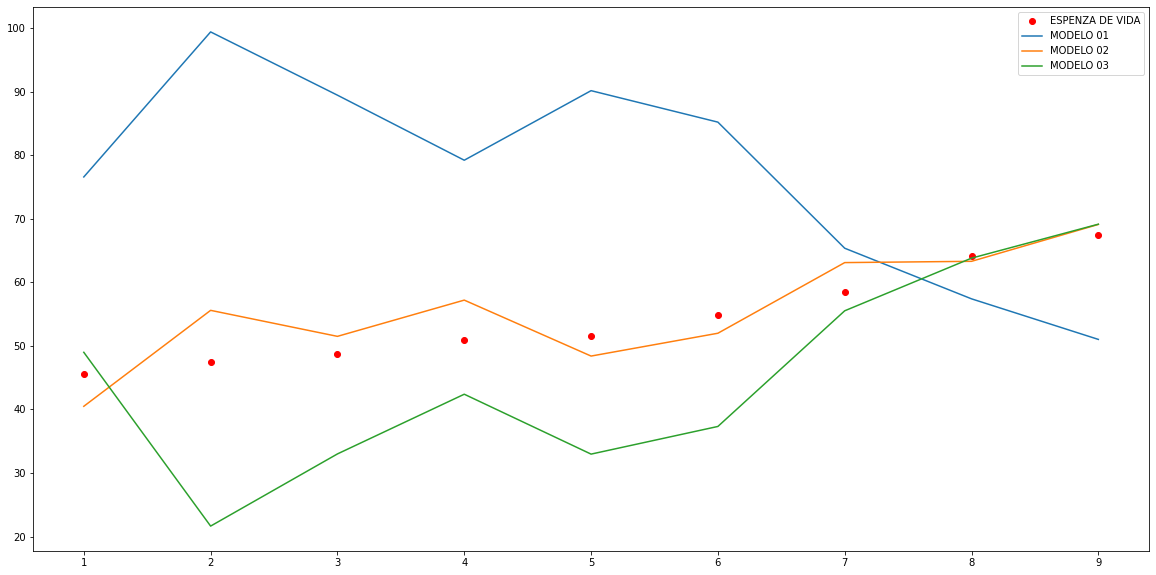

In [ ]:
#@title Modelos ajustados
plt.figure(figsize=(20, 10))

dfev = (pd.DataFrame([(67.4, 51.02, 69.1 , 69.14),
                      (64.2, 57.4 , 63.3 , 63.8),
                      (48.7, 89.43, 51.5 , 33.01),
                      (47.4, 99.38, 55.59, 21.66),
                      (58.5, 65.36, 63.1 , 55.52),
                      (51, 79.2 , 57.2 , 42.4),
                      (54.8, 85.19, 51.99, 37.33),
                      (51.6, 90.14, 48.4 , 32.98),
                      (45.6, 76.57, 40.5 , 48.99)])
          .rename(columns={0:'ESPERANZA_DE_VIDA',
                          1:'MODELO_01',
                          2:'MODELO_02',
                          3:'MODELO_03',})
          .sort_values(by='ESPERANZA_DE_VIDA')
         )

# dfev

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9],
         dfev.ESPERANZA_DE_VIDA,
         'ro',
         label = 'ESPENZA DE VIDA')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9],
         dfev.MODELO_01,
         label = 'MODELO 01')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9],
         dfev.MODELO_02,
         label = 'MODELO 02')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9],
         dfev.MODELO_03,
         label = 'MODELO 03')
plt.legend()
plt.show()

__Cómo seleccionar el mejor modelo?__

Al ajustar un modelo queremos saber que tan bueno o malo es el ajuste, para esto esperamos que la diferencia entre la linea ajustada y los puntos de los datos originales sea cero y si no es cero entonces esperamos que sea muy cercana a cero, a esta diferencia le llamamos perdida, el modelo que tenga las menores perdidas será el mejor modelo

### __Función de perdida__

La __función de perdida__ es una función que mide el error cometido al usar un modelo particular sobre un punto.

Ejemplos:

* <font color='CD5C5C'>$y - \hat y$</font> - Es la función de perdida más simple, también es conocida simplemente como __error__ y representa la diferencia entre el punto pronosticado (el de la linea ajustada) y el punto real

* <font color='CD5C5C'>$(y - \hat y)^2$</font> - Conocida como __errores cuadraticos__, cuenta con la propiedad de evitar que resultados muy similares para distintos puntos se cancelen al momento de calcular una perdida general

* <font color='CD5C5C'>$(y)log(\hat y) + (1 - y)log(1- \hat y)$</font> - __Binary cross entropy__ esta es regularmente usada en problemas de clasificación

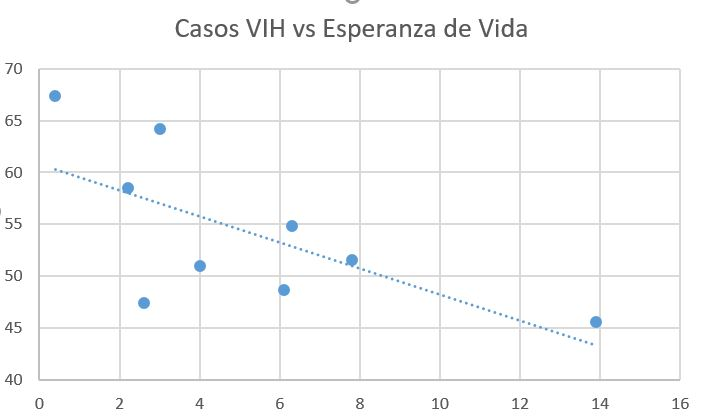

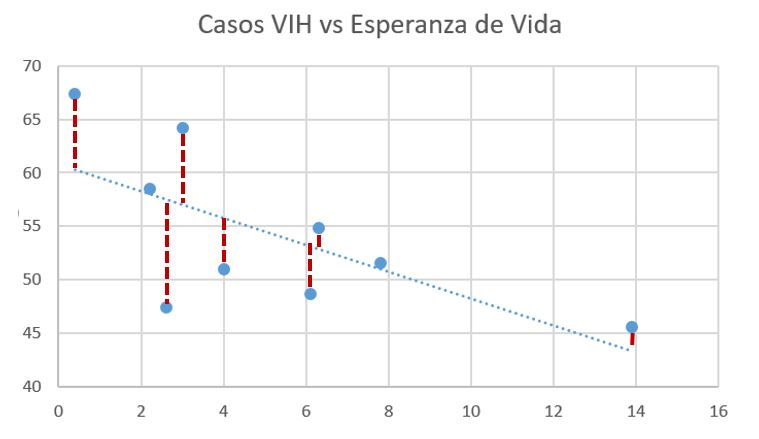

Pequeña desventaja: Sensible a Outliers

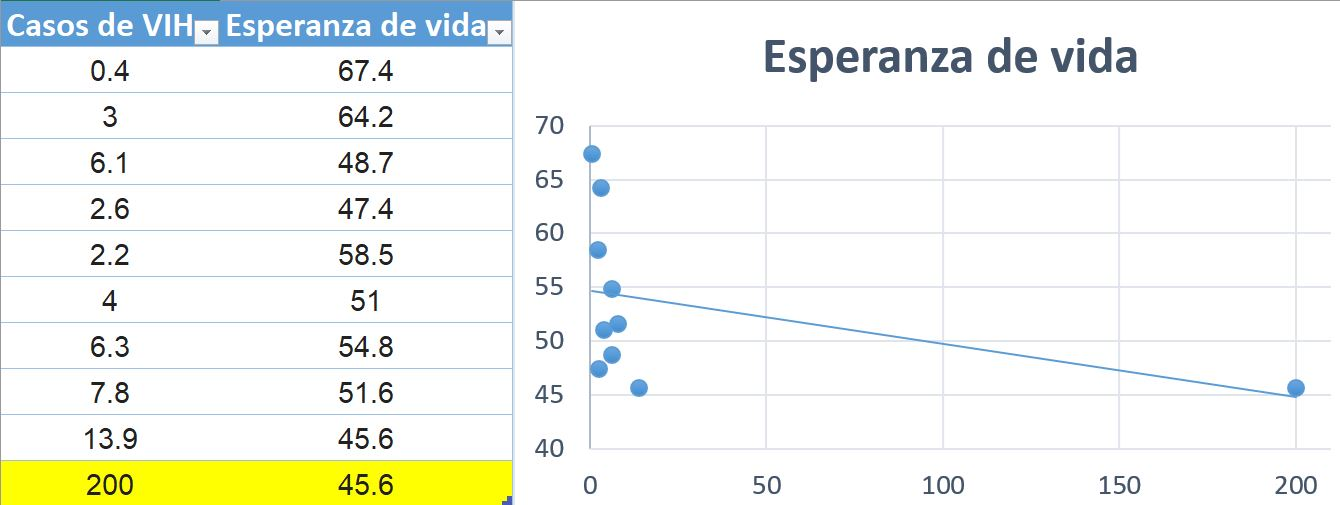

In [ ]:
# Modelo A 4 vars
Edad,  Género, Sueldo, IMC, Si es Wachiturro
21        1      15     20      0
28        0      17     22      0
...
# Modelo B 2 vars
?         ?      10     23      1
?         ?      20     26      1

# No supervisado

Dado que queremos que la linea (curva) ajustada este lo mas cerca posible a cada punto, esto implica que debemos lograr que la distancia entre la curva ajustada y cada uno de los puntos en los datos sea minima. 

Para lograr este objetivo usaremos la función de perdida de errores cuadraticos ya que esta función impide que resultados muy similares se cancelen a la hora de considerar los costos generales

In [ ]:
#@title Errores cuadraticos para cada modelo
(dfev
 .assign(ERROR_CUADRATICO_M01 = lambda row: (row['ESPERANZA_DE_VIDA'] - row['MODELO_01'])**2,
         ERROR_CUADRATICO_M02 = lambda row: (row['ESPERANZA_DE_VIDA'] - row['MODELO_02'])**2,
         ERROR_CUADRATICO_M03 = lambda row: (row['ESPERANZA_DE_VIDA'] - row['MODELO_03'])**2)
 )

,ESPERANZA_DE_VIDA,MODELO_01,MODELO_02,MODELO_03,ERROR_CUADRATICO_M01,ERROR_CUADRATICO_M02,ERROR_CUADRATICO_M03
8,45.6,76.57,40.50,48.99,959.1409,26.0100,11.4921
3,47.4,99.38,55.59,21.66,2701.9204,67.0761,662.5476
2,48.7,89.43,51.50,33.01,1658.9329,7.8400,246.1761
5,51.0,79.20,57.20,42.40,795.2400,38.4400,73.9600
7,51.6,90.14,48.40,32.98,1485.3316,10.2400,346.7044
6,54.8,85.19,51.99,37.33,923.5521,7.8961,305.2009
4,58.5,65.36,63.10,55.52,47.0596,21.1600,8.8804
1,64.2,57.40,63.30,63.80,46.2400,0.8100,0.1600
0,67.4,51.02,69.10,69.14,268.3044,2.8900,3.0276


Una vez que hemos obtenido las perdidas para cada punto, estamos en posibilidad de detectar cual es el mejor modelo que hasta ahora hemos ajustado.

### __Función de costo__

La función de costo es el promedio de las perdidas de cada modelo, su forma general es:

$$\frac{1}{N} \sum_{i=1}^N ( y_i - \hat y )^2 $$

Ejemplo: función de costo modelo 2

$\frac{26.01 + 67.07 + 7.83 + 38.44 + 10.24 + 7.89 + 21.16 + 0.81 + 2.88}{9}$ = $20.262$

Con base en la función de costo, el costo correspondiente de cada modelo es:

|Modelo| Costo|
|---|---|
|<font color='#D4AC0D'>MODELO_01</font>|987.3|
|<font color='#D4AC0D'>MODELO_02</font>|20.26|
|<font color='#D4AC0D'>MODELO_03</font>|184.23|

Esto implica que el modelo con el menor costo o que en promedio tiene la menor perdida es el modelo 02

## Betas

Sabemos que podemos generar muchas combinaciones de Betas y comparar los costos asociadas para que modelo que ajustemos, pero también sabemos que las betas que nos interesan son esas que hacen que la función de costo sea lo mas pequeña posible

Para encontrar las mejores betas tenemos dos formas de hacerlo:

* Usando la solución analitica con calculo vectorial (Minimos cuadrados ordinarios)
* Usando métodos de optimización (Descenso en gradiente)

### Solución analitica

Considerando que la __perdida cuadratica__ la escribimos de la siguiente forma:

$$\sum_{i=1}^N ( y_i - \hat y )^2 $$

Y recordando que el modelo general es:

$$ \hat{y} = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i} $$

Entonces podemos reescribir la __perdida cuadratica__ como:

$$\sum_{i=1}^N ( y_i - \beta_{0} + \sum_{j=1}^p \beta_{i}x_{i} )^2 $$

La expresión anterior puede ser reescrita en terminos matriciales de la forma:

$$(y - X \beta)^T (y - X \beta)$$

Obtenemos la primera derivada respecto a $\beta$

$$\frac{\partial}{\partial \beta} (y - X \beta)^T (y - X \beta) = -2X^T (y - X \beta) $$

Obtenemos la segunda derivada respecto a $\beta$

$$\frac{\partial^2}{\partial \beta \partial \beta} (y - X \beta)^T (y - X \beta) = -2X^T X$$

Asumiendo que $X$ es de rango completo y por lo tanto que $X^TX$ es positiva definida, igualamos la primera derivada a cero

$$-2X^T (y - X \beta) = 0$$

Despejamos $\beta$ y obtenemos la solución

<font color='CD5C5C'>$$\hat \beta = (X^T X)^{-1} X^Ty$$</font>

### Descenso en gradiente

Aunque el problema de mínimos cuadrados se puede resolver analíticamente, el método de descenso en gradiente es un método numérico básico que es efectivo y puede escalarse a problemas grandes de manera relativamente simple.

El Descenso en gradiente es conocido en ingles como __Gradient descent__ y __steepest descent__.

Intuitivamente la idea es avanzar varios pasos en la dirección opuesta al gradiente de la función del punto actual donde estamos parados ya que esta es la dirección donde está mas inclinada y por lo tanto podemos bajar mas rapido (steepest descent).

__NOTA__: si $f(x)$ es una función convexa, entonces el minimo local es el minimo global, por lo tanto si aplicamos descens en gradiente este nos dará el minimo global.

Para inicializar el descenso en gradiente seguimos estos pasos:

1. Seleccionamos un punto inicial de forma aleatoria $z^{(0)}$
2. Calculamos la derivada en ese punto $h'(z^{(0)})$
3. Seleccionamos una tasa de aprendizaje $\alpha$ de tal forma que $\alpha > 0$
4. Calculamos $z^{(1)}$ por medio de $z^{(1)} = z^{(0)} - \alpha h'(z^{(0)})$
5. para el resto de iteraciones usamos $z^{(i)} = z^{(i-1)} - \alpha h'(z^{(i-1)})$

__NOTAS__:
1. El Objetivo es que $z^{(i)}$ converja para terminar la iteración
2. A $\alpha$ en el argot de ML le llamamos tasa de aprendizaje
3. Si $\alpha$ es demasiado grande el algoritmo sera muy rapido pero corre el riesgo de diverger
4. Si $\alpha$ es demasiado pequeño el algoritmo sera muy lento pero la convergencia es mas segura
5. La convergencia de descenso en gradiente (y también el desempeño numérico para otros algoritmos) puede dificultarse cuando las variables tienen escalas muy diferentes. Esto produce curvaturas altas en la función que queremos minimizar.

Ejemplo, consideremos la siguiente función: 

$$ h(x) = x^2 + (x - 2)^2 - log(x^2 + 1) $$

Para poder encontrar el minimo, necesitamos realizar los siguientes pasos:

1. Obtener la derivada de $h(x)$
2. Definir una tasa de aprendizaje $\alpha$

derivada de $h(x)$

$$h'(x) =  2x + 2(x-2) - \frac{2x}{x^2 + 1}$$

Definimos $\alpha$

$$\alpha = 0.4$$

Siguiendo los pasos descritos para inicializar el descenso en gradiente, programamos en python código par obtener el minimo de $h(x)$

In [ ]:
# derivada de h(x)
def h_deriv(x):
  return 2*x + 2*(x - 2) - 2*x/(x**2 + 1)

1. Seleccionamos un punto inicial de forma aleatoria $z^{(0)}$

In [ ]:
z_0 = 5

2. Calculamos la derivada en ese punto $h'(z^{(0)})$

In [ ]:
h_deriv(5)

15.615384615384615

3. Seleccionamos una tasa de aprendizaje $\alpha$ de tal forma que $\alpha > 0$

In [ ]:
# tasa de aprendizaje
alpha = 0.4

4. Calculamos $z^{(1)}$ por medio de $z^{(1)} = z^{(0)} - \alpha h'(z^{(0)})$

In [ ]:
z_1 = z_0 - alpha * h_deriv(5)
z_1

-1.2461538461538462

5. para el resto de iteraciones usamos $z^{(i)} = z^{(i-1)} - \alpha h'(z^{(i-1)})$

In [ ]:
# iteramos 20 veces

z_i = z_1
z_valores = [z_1]

for i in range(20):
  z_i = z_i - alpha*h_deriv(z_i)
  z_valores.append(z_i)

z_valores

[-1.2461538461538462,
 -1.246145837803991,
 -1.2461378294875278,
 -1.2461298212044567,
 -1.2461218129547775,
 -1.24611380473849,
 -1.2461057965555942,
 -1.2460977884060895,
 -1.246089780289976,
 -1.2460817722072535,
 -1.2460737641579218,
 -1.2460657561419808,
 -1.2460577481594304,
 -1.2460497402102702,
 -1.2460417322945,
 -1.24603372441212,
 -1.2460257165631299,
 -1.2460177087475295,
 -1.2460097009653186,
 -1.246001693216497,
 -1.2459936855010645]

Validamos visualmente los resultados

In [ ]:
# Graficamos la función original

def h_x(x):
  return x**2 + (x - 2)**2 - np.log(x**2 + 1)

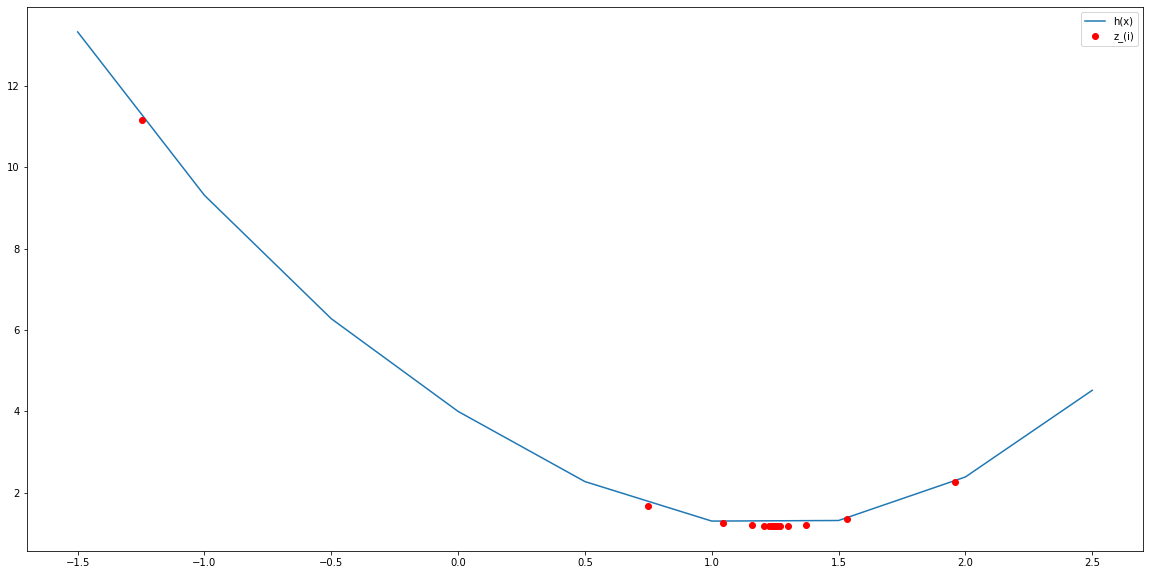

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot([i/2 for i in range(-3, 6, 1)],
         [h_x(i/2)  for i in range(-3, 6, 1)],
         label = 'h(x)')
plt.plot(z_valores,
         [h_x(i)  for i in z_valores],
         'ro',
         label = 'z_(i)')
plt.legend()
plt.show()

Si te interesa entender un poco mas sobre este algoritmo, puedes revisar [este video](https://www.youtube.com/watch?v=A6FiCDoz8_4) de DotCSV

## Regresión lineal

En el enfoque tradicional, se usan soluciones analíticas del problema de minimización y técnicas de álgebra lineal. Este método es efectivo para problemas con pocos datos.

En términos de escalamiento y simplicidad, el método de __descenso en gradiente__ y sus variantes es muy efectivo para escalar a datos grandes y modelos más complejos como redes neuronales profundas.

Usemos __scikit-learn__ para ajustar un modelo lineal al dataset __california housing__.

In [ ]:
from sklearn.model_selection import train_test_split
#######################
from sklearn.linear_model import LinearRegression
#######################
from sklearn.datasets import fetch_california_housing
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
housing = fetch_california_housing()
housing_dataframe = pd.DataFrame(housing['data'], columns=housing.feature_names)
housing_dataframe['target'] = housing['target']

In [ ]:
housing_dataframe.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


Información de los datos:

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

La variable target es __target__ que es el valor medio de las viviendas de los distritos de california expresado en cientos de miles de dolaeres ($100,000).

Creamos los arreglos de features y labels

In [ ]:
X = housing_dataframe.drop(columns = ['target'])
y = housing_dataframe['target']

In [ ]:
# instanciamos el modelo
reg_all = LinearRegression()

In [ ]:
# ajustamos los datos al modelo
reg_all.fit(X, y)

LinearRegression()

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### Evaluación del modelo

Las métricas de evaluación utilizadas en Regresión nos sirven para entender el desempeño de los modelos utilizados con nuestros datos.

In [ ]:
# Probemos el algoritmo con los mismos datos que usamos para el entrenamiento
y_pronostico = reg_all.predict(X)

In [ ]:
y_pronostico

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [ ]:
len(y_pronostico)

20640

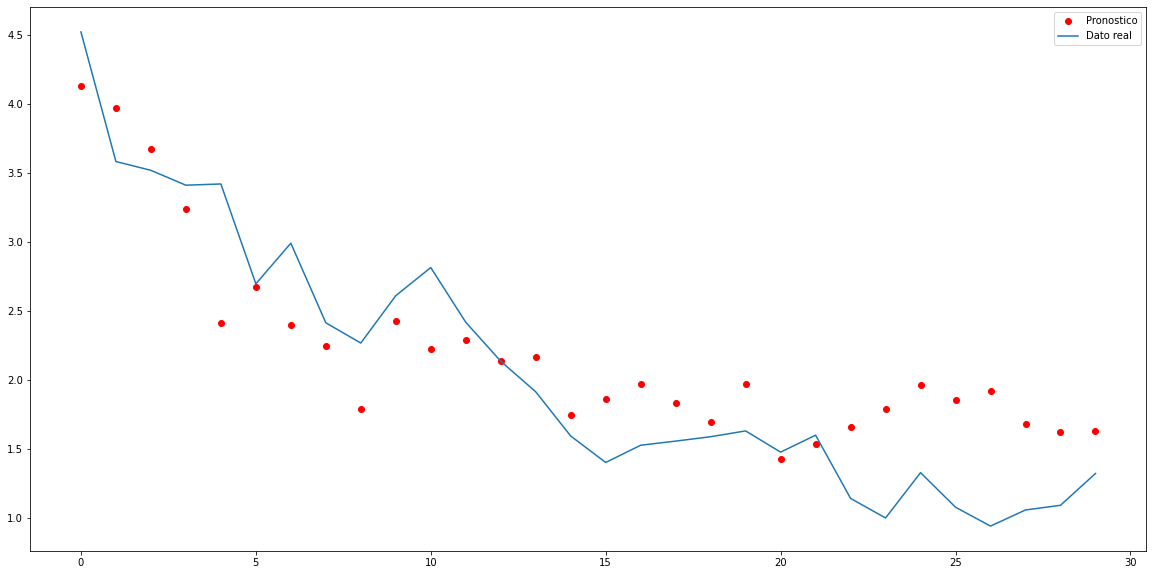

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_pronostico[:30])),
         y_pronostico[:30],
         'ro',
         label = 'Pronostico')

plt.plot(range(len(y[:30])),
         y[:30],
         label = 'Dato real')

plt.legend()
plt.show()

#### R<sup>2</sup>

Es la proporción de la variación en la variable dependiente `y` que es predecible a partir de la(s) variable(s) independiente(s) $x_i$'s

Este valor oscila en el intervalo [0, 1] y entre más alto sea el valor mejor será el resultado, porque la proporción de varianza explicada por el modelo será mayor. 

Para obtener esta metrica necesitamos calcular:

* la media de las respuestas (target) observadas

    $\overline{y} = \frac{1}{n} \sum_{i}^{n} y_i$

* la suma de los residuos entre valores reales y pronosticados al cuadrado, en ingles conocido como _sum of squares of residuals_ o _the residual sum of squares_

    $SS_{res} = \frac{1}{n} \sum_{i}^{n} (y_i - \hat y_i )^2$

* suma de las diferencias entre los valores observados y la media, tambin conocida como la suma total de cuadrados (proporcional a la varianza de los datos)

    $SS_{total} = \frac{1}{n} \sum_{i}^{n} (y_i - \overline{y})^2$

Con estos resultados obtenemos la $R^2$

\begin{matrix}
 & R^2 = \frac{SS_{total}}{SS_{res}}  
\end{matrix}

*   La línea NEGRA (la media) tiene mucho error
*   La linea AZUL (mi pronóstico) puede tener poco o mucho error

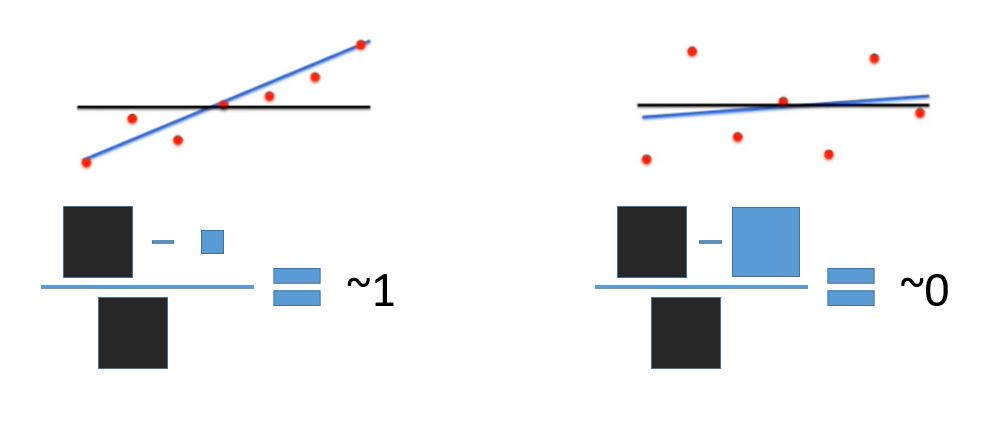

In [ ]:
metrics.r2_score(y, y_pronostico)

0.606232685199805

#### R<sup>2</sup> Ajustada

Estas metrica la usamos ya que a medida que añadimos variables a una regresión, la $R^2$ regular tiende a aumentar. Incluso cuando la contribución marginal de cada una de las nuevas variables añadidas no tiene relevancia estadística.

Por lo tanto, al añadir variables al modelo, el coeficiente de determinación podría aumentar y podríamos pensar, de manera errónea, que el conjunto de variables elegido es capaz de explicar una mayor parte de la variación de la variable independiente generando así un problema sobreestimación del modelo.

Dado lo anterior, está metrica busca mitigar el efecto inducido de agregar muchas variables

Esta metrica la obtenemos de la siguiente forma:

\begin{matrix}
 & \overline{R}^2 =1 - (1 - R^2) \frac{n - 1}{n - p - 1}  
\end{matrix}

Con:
* $n$ número de observaciones
* $p$ número de variables independientes (features)

In [ ]:
1-(1-0.606232685199805)*(20639/(20639-100))

0.604315516326928

Esta metrica puede ser negatica por dos moticos:

* Cuanto más se aproxime p a n.
* Cuanto menor sea el coeficiente de determinación.

#### MAE



Error medio absoluto. Penaliza por igual todas las diferencias. Es muy sensible a outliers y valores inesperados.

\begin{equation}
MAE = \frac{1}{n} \sum_{i}^{n} |y_i - \hat y_i|
\end{equation}

In [ ]:
print(y.to_list())
y_pronostico

[4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267, 2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4, 1.525, 1.555, 1.587, 1.629, 1.475, 1.598, 1.139, 0.997, 1.326, 1.075, 0.938, 1.055, 1.089, 1.32, 1.223, 1.152, 1.104, 1.049, 1.097, 0.972, 1.045, 1.039, 1.914, 1.76, 1.554, 1.5, 1.188, 1.888, 1.844, 1.823, 1.425, 1.375, 1.875, 1.125, 1.719, 0.938, 0.975, 1.042, 0.875, 0.831, 0.875, 0.853, 0.803, 0.6, 0.757, 0.75, 0.861, 0.761, 0.735, 0.784, 0.844, 0.813, 0.85, 1.292, 0.825, 0.952, 0.75, 0.675, 1.375, 1.775, 1.021, 1.083, 1.125, 1.313, 1.625, 1.125, 1.125, 1.375, 1.188, 0.982, 1.188, 1.625, 1.375, 5.00001, 1.625, 1.375, 1.625, 1.875, 1.792, 1.3, 1.838, 1.25, 1.7, 1.931, 2.578, 2.734, 2.375, 3.5, 3.357, 3.134, 2.685, 2.594, 2.757, 2.25, 2.625, 2.185, 2.55, 2.241, 2.431, 2.316, 2.185, 2.341, 3.276, 3.476, 3.661, 3.35, 3.736, 3.895, 3.911, 3.373, 2.952, 2.923, 4.115, 3.115, 3.259, 3.926, 3.193, 3.333, 3.352, 3.512, 3.689, 3.659, 3.667, 3.628, 4.833, 3.314, 3.235, 2.167, 2.331, 2.9

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [ ]:
metrics.mean_absolute_error(y, y_pronostico)

0.5311643817546476

#### MSE

Error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas.
\begin{equation}
MSE = \frac{1}{n} \sum_{i}^{n} (y_i - y_i')^{2}
\end{equation}

In [ ]:
metrics.mean_squared_error(y, y_pronostico)

0.5243209861846072

#### RMSE



Raíz error cuadrático medio. Penaliza más las grandes diferencias que las pequeñas. Es interpretable en las mismas unidades que *y*.
\begin{equation}
RMSE = \sqrt{\frac{1}{n} \sum_{i}^{n} (y_i - y_i')^{2}}
\end{equation}

In [ ]:
np.sqrt(metrics.mean_squared_error(y, y_pronostico))

0.7241001216576387

## Regularización

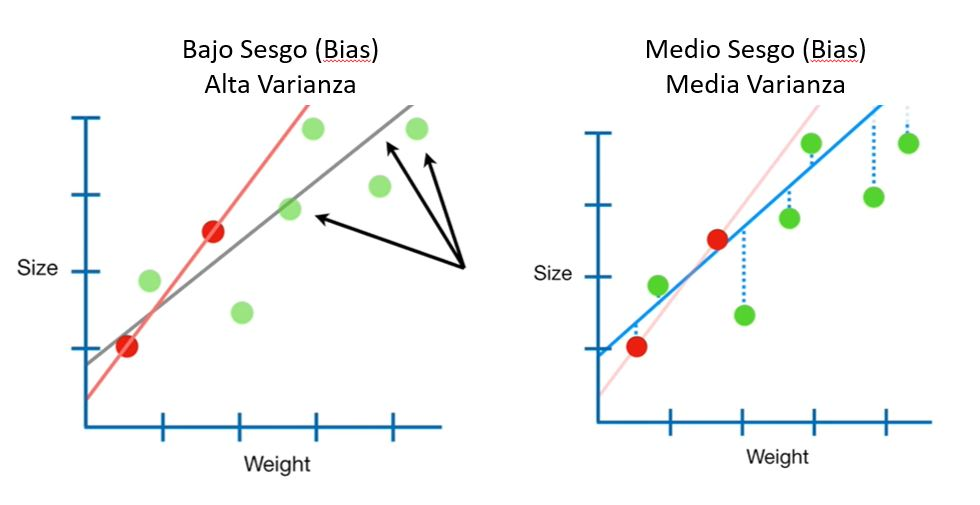

La regularización puede ayudarnos a reducir los efectos del bias y la varianza y en esta parte veremos como utilizarla en modelos de regresión.


### Ridge regression

La __Regresión Ridge__ (Regularización Tikhonov) es una versión regularizada de la regresió lineal que agrega una penalización extra a la función de costo, obligando al algoritmo de aprendizaje a que se ajuste a los datos al mismo tiempo que lo obliga a mantener sus pesos lo mas pequeños posibles

La penalización impuesta a la función de costo se basa en la norma $L_2$.

$$ \frac{1}{N} \sum_{i=1}^N ( y_i - \hat{y_i} )^2 + \alpha \sum_{i=1}^N \beta_i^2 $$

El parámetro libre $\alpha$ regula la cantidad de regularización que queemos aplicar al modelo. Vamos a probar varios valores de $\alpha$ para evaluar como afecta al performance del modelo:

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# aqui nos interesa maximizare porque estamos usando R cuadrada (y queremos que R cuadrada sea lo mas cercano posible a uno])
training_r2_scores = []

alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X, y)
    y_pred = ridge.predict(X)
    training_r2_scores.append(metrics.r2_score(y, y_pred))

In [ ]:
list(zip(alphas, training_r2_scores))

[(100, 0.6060287698313571),
 (30, 0.606210695938116),
 (10, 0.6062301017655631),
 (5, 0.6062320300634568),
 (1, 0.6062326586911465),
 (0.1, 0.6062326849340285),
 (0.01, 0.6062326851971466),
 (0.001, 0.6062326851997785)]

### Lasso regression

La __Regresión Lasso__ (_Least Absolute Shrinkage and Selection Operator_) es otra versión regularizada de la regresión lineal y de la misma forma que actura Ridge sopbre la función de costo, esta regresión también penaliza pero usando la norma $L_1$

$$ \frac{1}{N} \sum_{i=1}^N ( y_i - \hat{y_i} )^2 + \alpha \sum_{i=1}^N |\beta_i| $$

Una Caracteristica muy importante de la regresión Lasso es que tiende a eliminar los pesos de los _features_ menos importantes (i.e. automaticamente hace selección de variables)

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

In [ ]:
# aqui nos interesa maximizare porque estamos usando R cuadrada (y queremos que R cuadrada sea lo mas cercano posible a uno])
training_r2_scores = []

alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X, y)
    y_pred = lasso.predict(X)
    training_r2_scores.append(metrics.r2_score(y, y_pred))

In [ ]:
list(zip(alphas, training_r2_scores))

[(100, 0.0),
 (30, 8.054843234239772e-05),
 (10, 0.000549044642994212),
 (5, 0.0005929661627429583),
 (1, 0.28526231449198314),
 (0.1, 0.5452665703368436),
 (0.01, 0.6024178576491683),
 (0.001, 0.6061945447229312),
 (0.0001, 0.6062323038136528),
 (1e-05, 0.6062326813860297),
 (1e-06, 0.6062326851616667)]

In [ ]:
test_rmse = []

alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X, y)
    y_pred = lasso.predict(X)
    test_rmse.append(np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [ ]:
# aqui nos interesa minimizar porque estamos usando el RMSE
list(zip(alphas, test_rmse))

[(100, 1.1539282040412253),
 (30, 1.153881729551409),
 (10, 1.1536113814984101),
 (5, 1.1535860331201435),
 (1, 0.9755558311126926),
 (0.1, 0.7781390844349135),
 (0.01, 0.7275992172579749),
 (0.001, 0.7241351891380737),
 (0.0001, 0.7241004723237325),
 (1e-05, 0.7241001251642212),
 (1e-06, 0.724100121692705)]

In [ ]:
# Instanciamos la regresión lasso
lasso = Lasso(alpha=0.000001)
# lasso = Lasso(alpha=0.000001, normalize=True)

# Ajustamos a los datos
lasso.fit(X, y)

y_pred = lasso.predict(X)

print("R^2", metrics.r2_score(y, y_pred))
print("rmse", np.sqrt(metrics.mean_squared_error(y, y_pred)))

R^2 0.6062326851616667
rmse 0.724100121692705


In [ ]:
# obtenemos los coeficientes
lasso_coef = lasso.coef_
print(lasso_coef)

[ 4.36689610e-01  9.43584635e-03 -1.07314944e-01  6.45028620e-01
 -3.97611622e-06 -3.78652760e-03 -4.21313166e-01 -4.34511975e-01]


In [ ]:
# columnas = housing_dataframe.drop(columns = ['target']).columns

In [ ]:
df_columns = housing_dataframe.drop(columns = ['target']).columns
coeficientes = pd.Series(lasso_coef, index=df_columns).sort_values(ascending=True)
coeficientes

Longitude    -0.434512
Latitude     -0.421313
AveRooms     -0.107315
AveOccup     -0.003787
Population   -0.000004
HouseAge      0.009436
MedInc        0.436690
AveBedrms     0.645029
dtype: float64

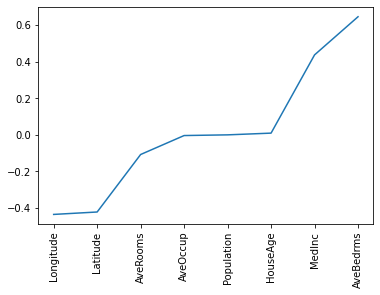

In [ ]:
plt.plot(range(len(coeficientes.index)), coeficientes.values)
plt.xticks(range(len(coeficientes.index)), coeficientes.index, rotation=90)
plt.show()

### Uso de regresiones

¿Cuando debemos usar la regresión lineal regular?

Siempre es preferible usar un poco de regularización y evitar la regresión lineal regular, podríamos considerar lo siguiente:

1. Usar _Ridge_ como regresión por defecto
2. Si sospechamos que solo algunos _features_ son útiles, entonces usar Lasso o Elastic Net

## Ejercicios

### Ejercicio 1

Usar el dataset Auto.csv y realizar lo siguiente:

* Estudie la estructura del dataset (dimensiones, tipos de datos, info basica)

In [ ]:
# Respuesta
auto = (pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/Auto.csv')
          .drop(columns = ['origin', 'name'])
          .loc[lambda row: row['horsepower'].str.isnumeric()]
          .assign(horsepower = lambda x: pd.to_numeric(x['horsepower']))
        )

* Usa `mpg` como variable target y crea dos objetos

    * `X` que será la matriz de inputs (donde estan los features)
    * `y` que será el arreglo donde estan todas las etiquetas (la variable target)

In [ ]:
# Respuesta

* Instancia `LinearRegression()` y guardalo en un objeto llamado `reg_all`

In [ ]:
# Respuesta
from sklearn.linear_model import LinearRegression

* Ajusta los datos al modelo usando el método `.fit()`

In [ ]:
# Respuesta

* Crea los pronosticos con el método `.predict()`

In [ ]:
# Respuesta

* Calcula la R cuadrada

In [ ]:
# Respuesta

* Calcula el RMSE

In [ ]:
# Respuesta

### Ejercicio 2

* Ajusta un modelo lasso para cada uno de los siguientes valores alpha, en cada ajuste guarda la $R^2$ y el RMSE que arroje cada modelo

```python
alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]
```



* Con base en los resultados obtenidos que valor de alpha hace que $R^2$ tenga el valor mas grande?

In [ ]:
# Respuesta

* Con base en los resultados obtenidos que valor de alpha hace que el RMSE tenga el valor mas pequeño?

In [ ]:
# Respuesta

* Ajusta un modelo usando `alpha = 0.00001`, una vez que este entrenado accede a los valores de los coeficientes usa el atributo `.coef_` e imprimelos

In [ ]:
# Respuesta

* Ajusta un modelo lasso para cada uno de los siguientes valores alpha, en cada ajuste guarda los valores de los coeficientes y crea una gráfica donde se muestren las curvas de cada feature:

    * Eje y valor de los coeficientes
    * Eje x valor de alpha
    * Usa curvas con un color por cada alpha

```python
alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001, 0.0001, 0.00001, 0.000001]
```

### Ejercicio 3

* Con el mismo dataset de autos ajusta un modelo Ridge para cada uno de los siguientes valores alpha, en cada ajuste guarda la $R^2$ y el RMSE que arroje cada modelo

```python
alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001]
```



In [ ]:
# Respuesta

* Con base en los resultados obtenidos que valor de alpha hace que $R^2$ tenga el valor mas grande?

In [ ]:
# Respuesta

* Con base en los resultados obtenidos que valor de alpha hace que el RMSE tenga el valor mas pequeño?

In [ ]:
# Respuesta

### Ejercicio 4

De todos los modelos Ajustados, si el objetivo es:

  1. Minimizar RMSE, cual es el mejor modelo y que parametro usa?
  1. Maximizar $R^2$, cual es el mejor modelo y que parametro usa?
  1. Maximizar $R^2$ y minimizar RMSE a la vez, cual es el mejor modelo y que parametro usa?

In [ ]:
# Respuesta